In [218]:
import torch
from PIL import Image
from torchvision import transforms
from collections import OrderedDict
from model.FSRCNN import FSRCNN, FSRCNN_Original
from model.SRCNN import SRCNN
from model.DRRN import DRRN
from model.VDSR import VDSR
from model.resnet_sr import ResNetPretrainedDS, ResNetPretrainedSS
from model.UNetSR import UNetSR, UNetD4, UNetNoTop

In [219]:
# model = UNetSR(in_c=3, out_c=3, output_paddings=[1, 1])
# model = DRRN()
# model = SRCNN()
# model = FSRCNN(factor=3)
# model = FSRCNN_Original(scale_factor=3)
# model = ResNetPretrainedDS
model = UNetD4()
# model = UNetNoTop()
# model = UNetSR()

weight_path = '/home/hacker/Insync/huakun.shen@gmail.com/Google Drive/Super-Resolution/SR/result/TEXT/unetd4-blur-7-MSE/weights/epoch150.pth'
# input_image_path = "/home/hacker/Documents/Super-Resolution/datasets/DIV2K/same_300/valid_100/0801.png"
input_image_path = "/home/hacker/Documents/Super-Resolution/datasets/TEXT/same/valid_BlurRadius7/1950.bmp"

In [220]:
loaded = torch.load(weight_path)

In [221]:
if type(loaded) == OrderedDict:
    print('old version checkpoint')
    model.load_state_dict(loaded)
    model.eval()
elif type(loaded) == dict:
    print("new version checkpoint")
    model.load_state_dict(loaded['state_dict'])
    model.eval()
else:
    raise ValueError("wrong format")

new version checkpoint


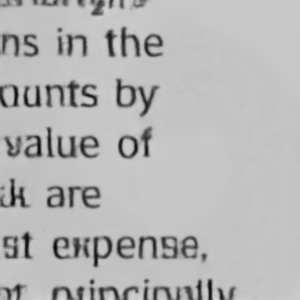

In [222]:
img = transforms.ToTensor()(Image.open(input_image_path)).unsqueeze(0)
transforms.ToPILImage()(model(img).squeeze(0))

In [223]:
torch.save(model, '/home/hacker/Desktop/model.pth')

In [224]:
new_model = torch.load('/home/hacker/Desktop/model.pth')

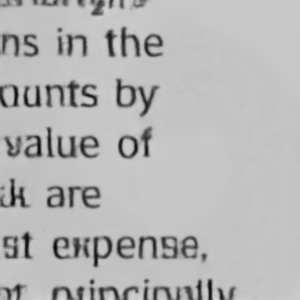

In [225]:
# verify saved model, should be the same result as previous image
transforms.ToPILImage()(new_model(img).squeeze(0))